In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from myPDS import compute_and_plot_fft, LowPassFIR


In [4]:
data = np.genfromtxt('system1.csv', delimiter=',')
sig_raw = data[:,1]
sig_raw = sig_raw[1:]

N = sig_raw.size
Fs = 10.0


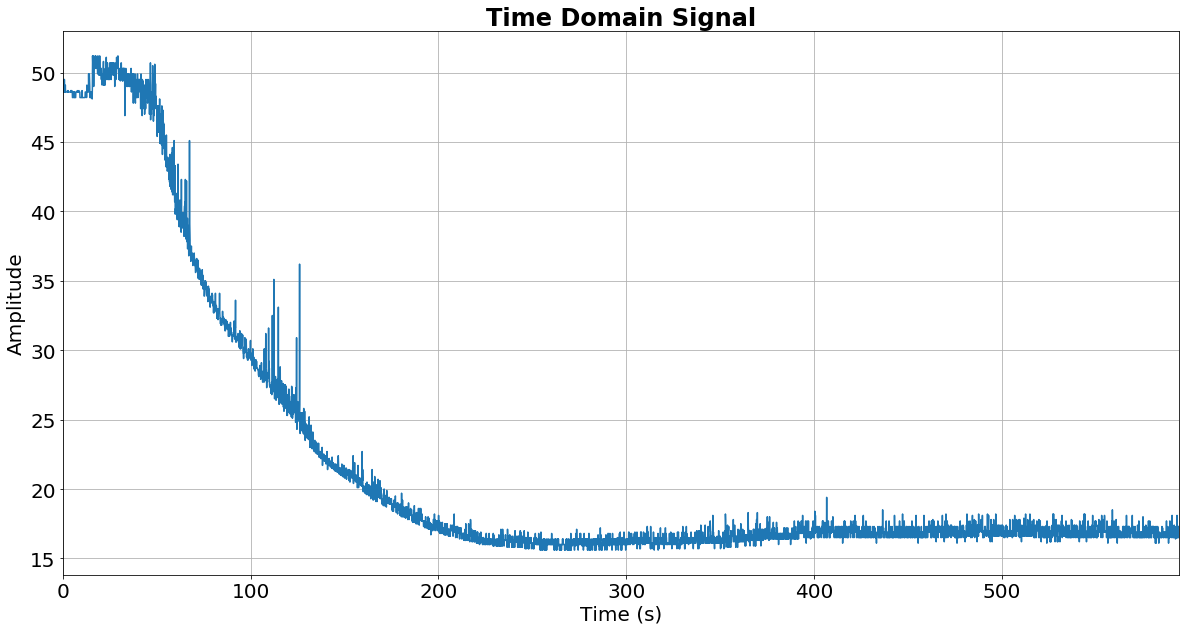

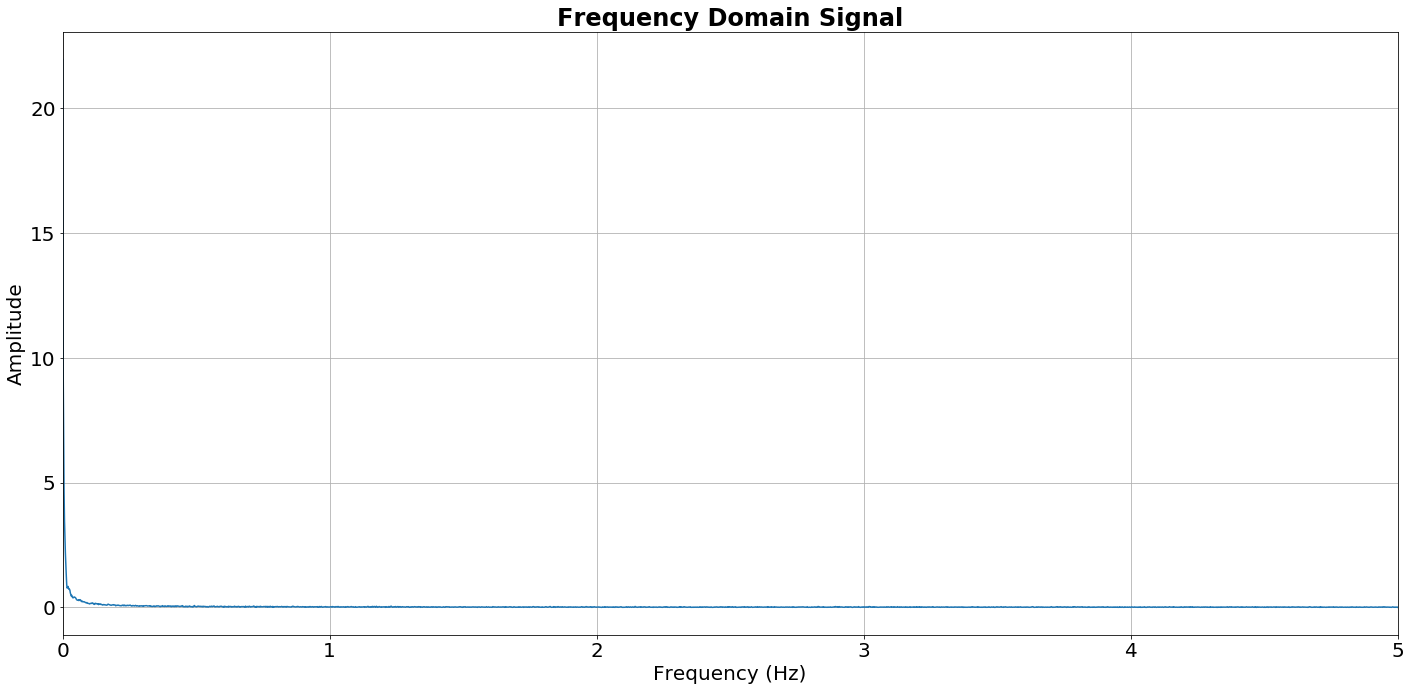

array([130483.1       +4.82103246e-12j,  24297.11805144-1.55518445e+04j,
         8976.22085569-1.88254485e+04j, ...,
         2601.41062221+1.37348271e+04j,   8976.22085569+1.88254485e+04j,
        24297.11805144+1.55518445e+04j])

In [5]:
compute_and_plot_fft(sig_raw, Fs)

In [45]:
fir_lp = LowPassFIR(fc=0.1, transition_width=0.7, stopband_attenuation=50, passband_ripple=0.1, Fs=10)
b = fir_lp.getFilterCoeffs()


hamming


/tmp/ipykernel_11098/2703049875.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(b.T)


49

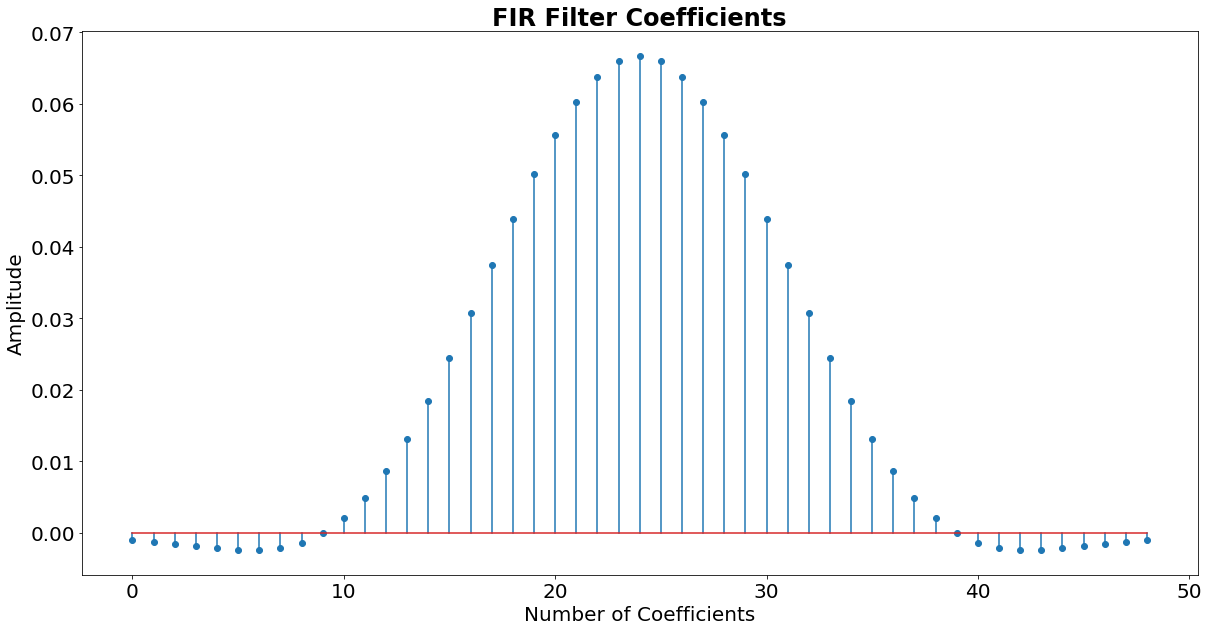

In [46]:
plt.figure(1, figsize=(20,10))
plt.title("FIR Filter Coefficients", fontweight="bold")
plt.xlabel("Number of Coefficients")
plt.ylabel("Amplitude")
plt.stem(b.T)
print(fir_lp.getWindow())
b.size

In [47]:
sig_raw = sig_raw.reshape(sig_raw.size)
b = b.reshape(b.size)

y = np.convolve(sig_raw, b)


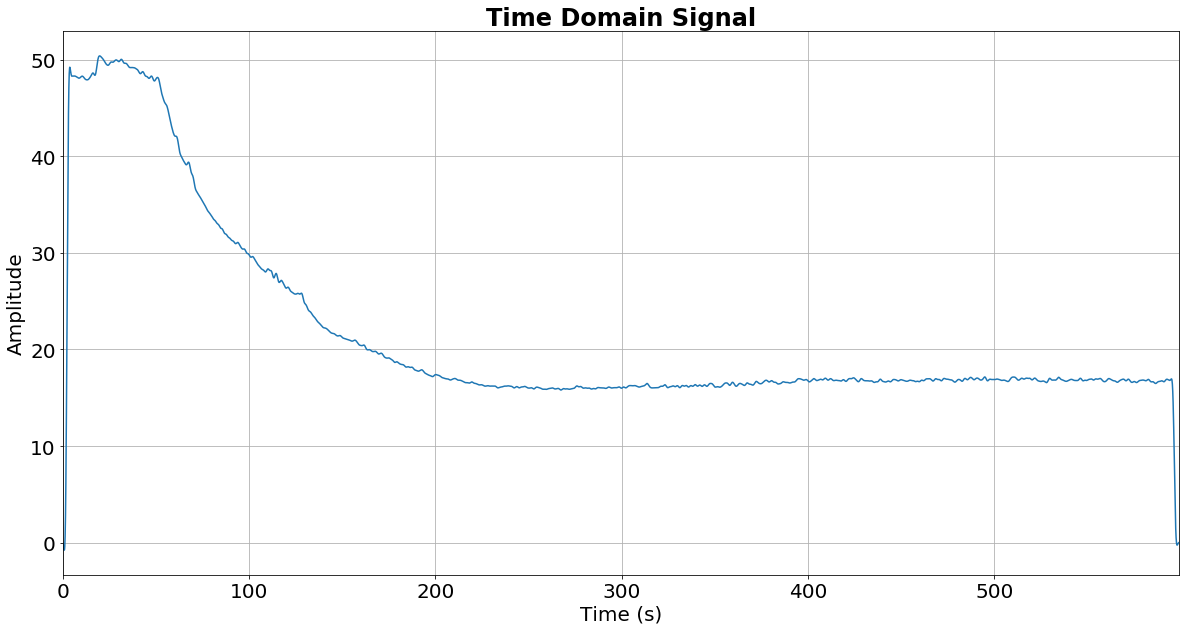

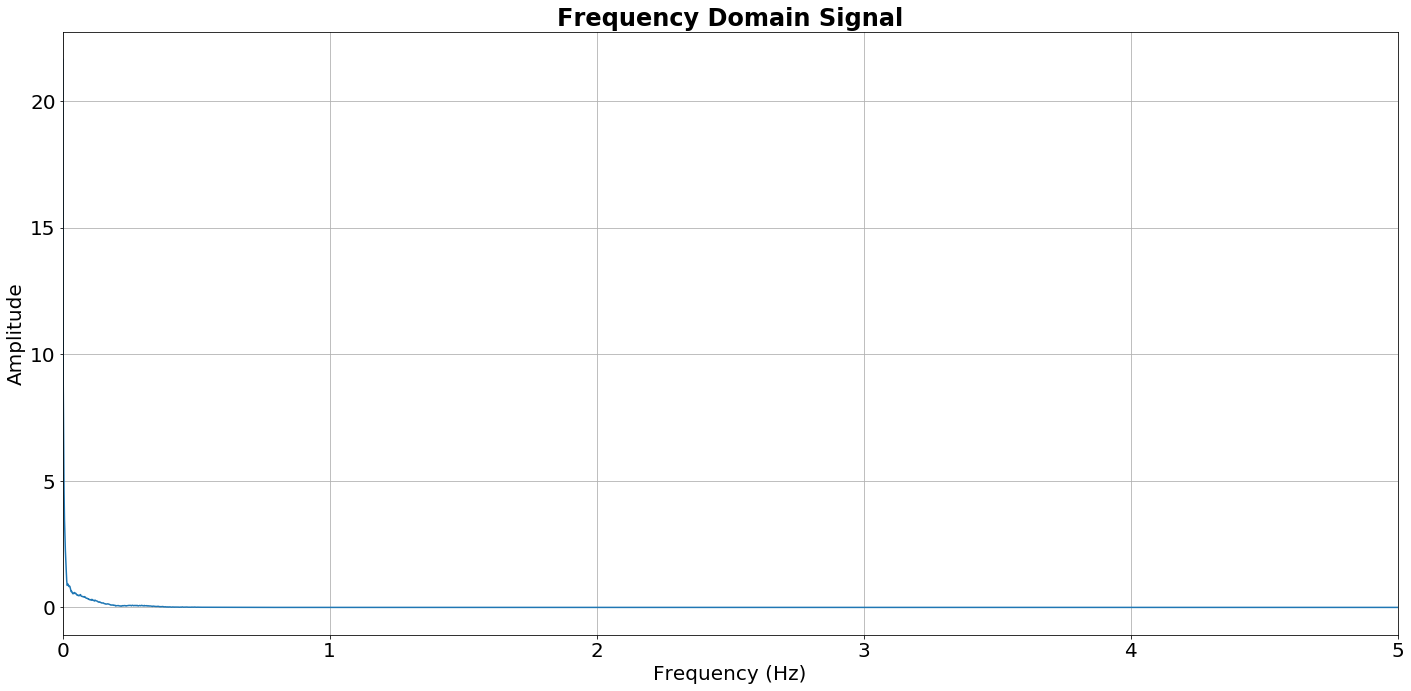

array([129705.41507212+1.18216548e-12j,  23055.71646791-1.59607442e+04j,
         7340.4385835 -1.92267164e+04j, ...,
          815.28492891+1.39239829e+04j,   7340.4385835 +1.92267164e+04j,
        23055.71646791+1.59607442e+04j])

In [48]:
compute_and_plot_fft(y, Fs)

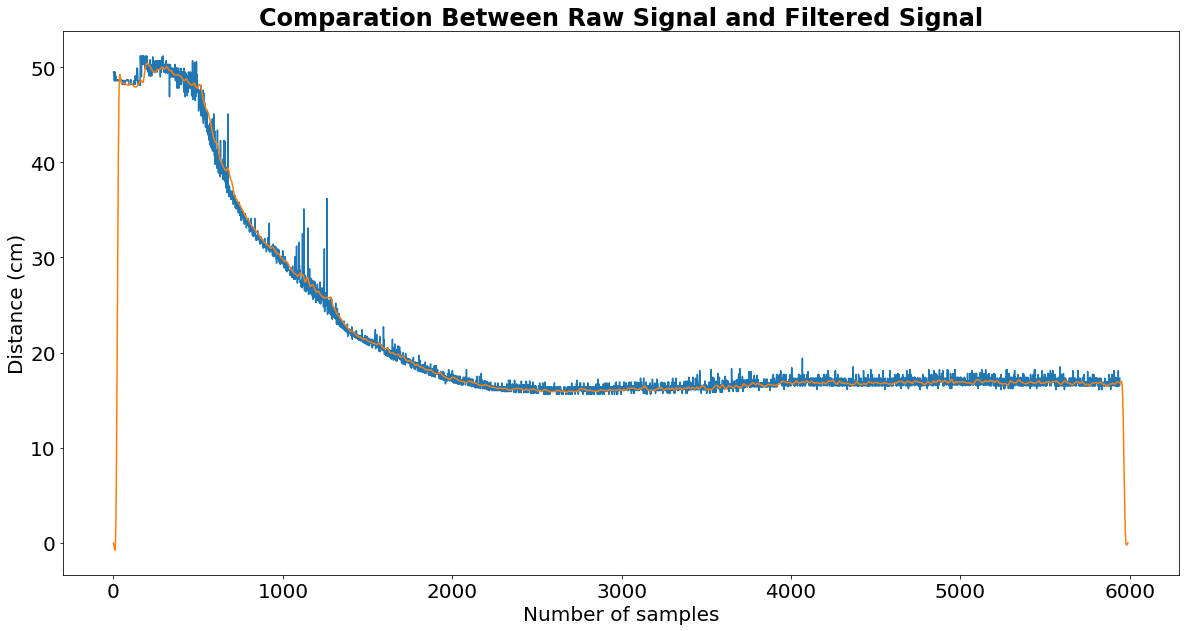

In [49]:
plt.figure(1, figsize=(20,10))
plt.title("Comparation Between Raw Signal and Filtered Signal", fontweight="bold")
plt.xlabel("Number of samples")
plt.ylabel("Distance (cm)")
plt.plot(sig_raw)
plt.plot(y)

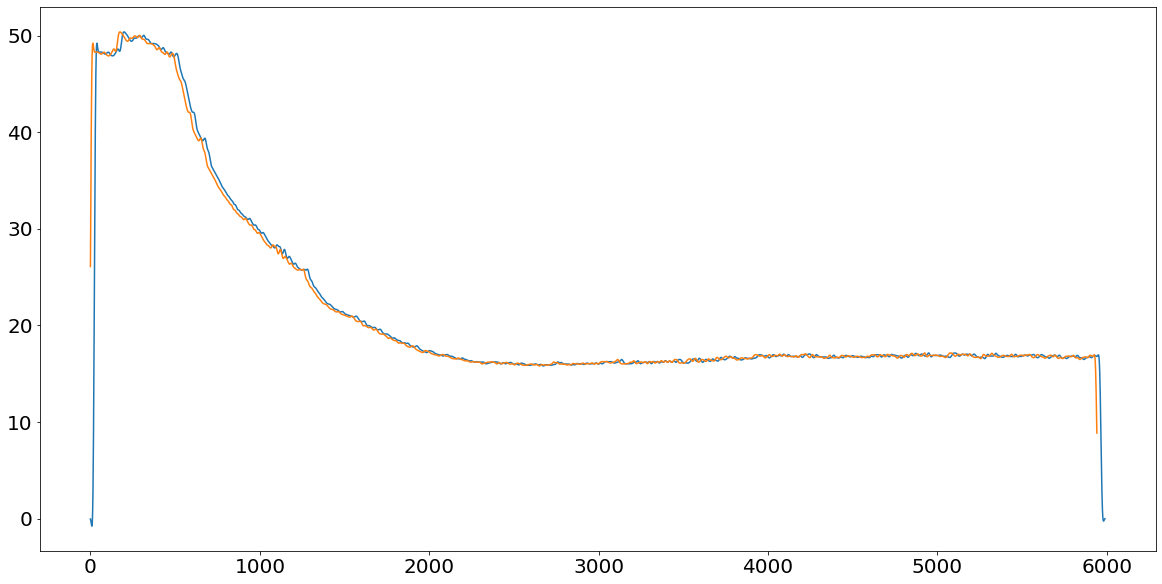

In [50]:
y1 = y[int(b.size/2):-int(b.size/2)]
plt.figure(1, figsize=(20,10))
plt.plot(y)
plt.plot(y1)

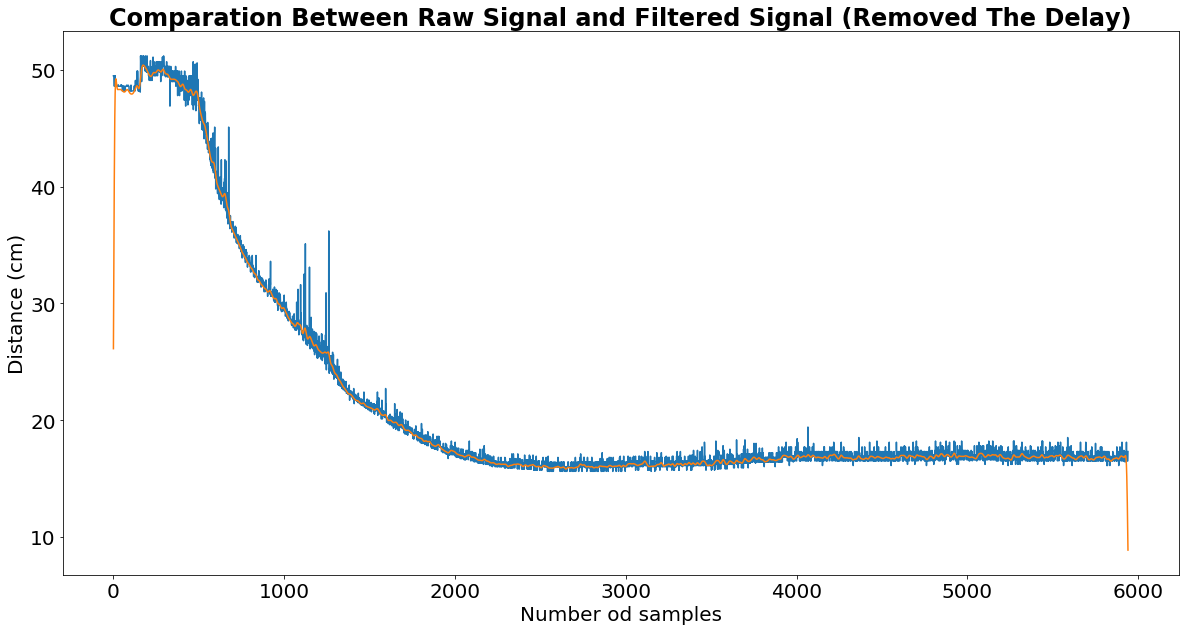

In [51]:
plt.figure(1, figsize=(20,10))
plt.title("Comparation Between Raw Signal and Filtered Signal (Removed The Delay)", fontweight="bold")
plt.xlabel("Number od samples")
plt.ylabel("Distance (cm)")
plt.plot(sig_raw)
plt.plot(y1)

In [52]:
from os.path import isfile
from os import remove

if isfile("filter_coeffs.txt"):
  remove("filter_coeffs.txt")

with open("filter_coeffs.txt", "a") as file:
  for coeff in b:
    file.write(str(coeff)+'\n')
  file.close()



In [53]:
max(y)

50.41109794718457

In [54]:
wf, hf = freqz(b.T, 1, worN=1024, fs=Fs)


Text(0.5, 1.0, 'Frequency Response')

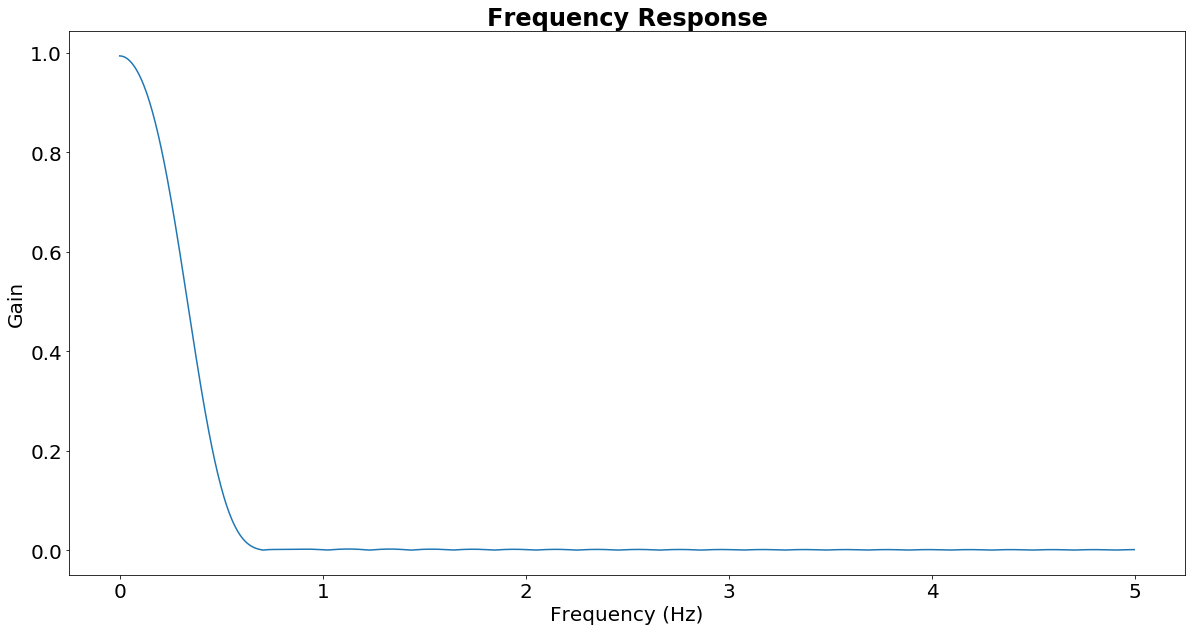

In [55]:
plt.figure(1, figsize=(20,10))
plt.plot(wf, np.absolute(hf))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.title("Frequency Response", fontweight="bold")


Text(0.5, 1.0, 'Frequency Response')

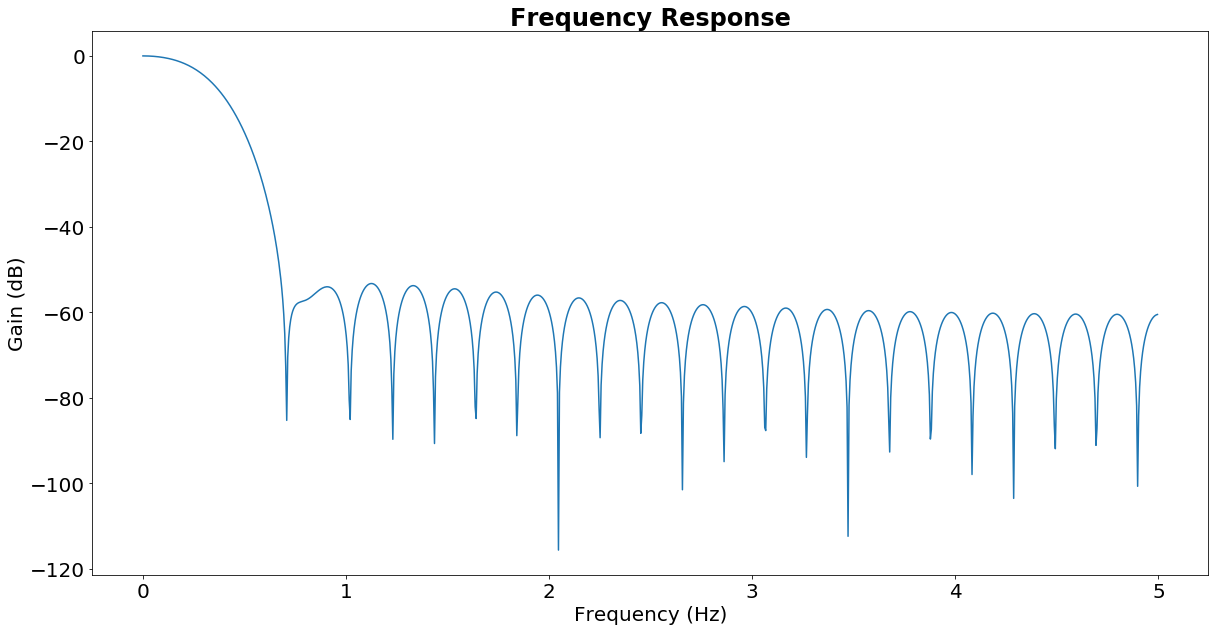

In [56]:
# Plotagem em dB
plt.figure(1, figsize=(20,10))
plt.plot(wf, 20*np.log10(np.absolute(hf)))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.title("Frequency Response", fontweight="bold")